In [1]:
pip install efficientnet_pytorch

In [2]:
import sys, os, random
import cv2 as cv
import torch
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
from torchsummary import summary
from torchvision import datasets, models, transforms
from torch.utils.tensorboard import SummaryWriter
from efficientnet_pytorch import EfficientNet

random.seed(322)

In [3]:
sys.path.append(os.path.abspath('/content/drive/My Drive/Colab Notebooks'))

In [4]:
from Train.Train import Train
from Dataset.DFDC import DFDC
from Utils.Utils import gridshow
from Eval.Eval import Eval

In [5]:
# Basic Data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

TRAINING_DATA_FOLDER = '/content/drive/My Drive/DFDC/Training_Images'
TESTING_DATA_FOLDER = '/content/drive/My Drive/DFDC/Testing_Images'
REAL_FOLDER = 'REAL'
FAKE_FOLDER = 'FAKE'

train_list_real = list(os.listdir(os.path.join(TRAINING_DATA_FOLDER, REAL_FOLDER)))
train_list_fake = list(os.listdir(os.path.join(TRAINING_DATA_FOLDER, FAKE_FOLDER)))

In [6]:
# Create dataset for training and testing
train_image_datasets = datasets.ImageFolder(TRAINING_DATA_FOLDER, data_transforms['train'])
test_image_datasets = datasets.ImageFolder(TESTING_DATA_FOLDER, data_transforms['test'])

In [7]:
writer = SummaryWriter('/content/drive/MyDrive/Colab Notebooks/Tensorboard_Log/Pytorch_Eff0_Base/'+str(datetime.now()))
device = torch.device("cuda:0")
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=1)
model = Train(model, train_image_datasets, device, writer)
model, loader = model.run()

Loaded pretrained weights for efficientnet-b0
Epoch 1/10



train Loss: 0.6072 Acc: 0.6865



val Loss: 0.6886 Acc: 0.5268

Epoch 2/10



train Loss: 0.4215 Acc: 0.8198



val Loss: 0.5962 Acc: 0.6366

Epoch 3/10



train Loss: 0.2580 Acc: 0.9038



val Loss: 0.4827 Acc: 0.7927

Epoch 4/10



train Loss: 0.1828 Acc: 0.9416



val Loss: 0.4623 Acc: 0.8073

Epoch 5/10



train Loss: 0.1622 Acc: 0.9397



val Loss: 0.4374 Acc: 0.8244

Epoch 6/10



train Loss: 0.1526 Acc: 0.9489



val Loss: 0.3780 Acc: 0.8415

Epoch 7/10



train Loss: 0.1479 Acc: 0.9519



val Loss: 0.3431 Acc: 0.8463

Epoch 8/10



train Loss: 0.1629 Acc: 0.9470



val Loss: 0.3295 Acc: 0.8561

Epoch 9/10



train Loss: 0.1481 Acc: 0.9568



val Loss: 0.3243 Acc: 0.8683

Epoch 10/10



train Loss: 0.1410 Acc: 0.9580



val Loss: 0.3219 Acc: 0.8659

Training complete in 2m 50s
Best val Acc: 0.868293


In [8]:
eval = Eval(model,test_image_datasets,device)

In [9]:
eval.run()


F1 Score: 0.8385022385022386
Log Loss: 0.3945274245749412
Confusion Matrix:
[[82 13]
 [18 79]]


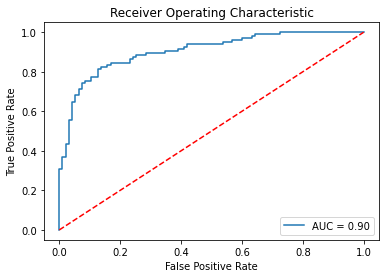

In [10]:
eval.plot_roc()

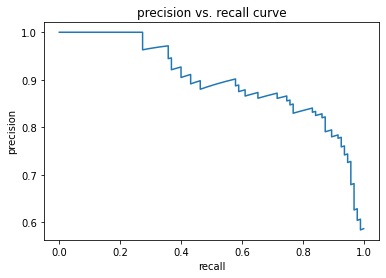

In [13]:
eval.plot_precisionrecall()